In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import itertools
import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_csv("/kaggle/input/modified-data1-a2/modified_dataset_1 - dataset_1.csv.csv")
df.index = df.index + 1

In [133]:
target = pd.DataFrame(df, columns=["Target"])
df = df.drop('Target', axis=1)

In [134]:
class LDA:
    def __init__(self, df, target):
        self.df = df
        self.target = target
        
    def normalize(self):
        self.df = preprocessing.normalize(self.df) 
        
    def transform(self):
        
        from sklearn.decomposition import PCA
        pca = PCA(n_components=50)

        dataset = pca.fit_transform(self.df)

        df_mod = pd.DataFrame(dataset)
        df_mod.index = df_mod.index + 1
        
        df_0 =df_mod.loc[target['Target'] == 0]
        df_1 =df_mod.loc[target['Target'] == 1]
        df_2 =df_mod.loc[target['Target'] == 2]
        
        df_0 = df_0.reset_index(drop=True)
        df_1 = df_1.reset_index(drop=True)
        df_2 = df_2.reset_index(drop=True)
        
        mean0 = df_0.loc[:,:].mean()
        mean1 = df_1.loc[:,:].mean()
        mean2 = df_2.loc[:,:].mean()

        N = [len(df_0), len(df_1), len(df_2)]

        ar = [df_0.to_numpy(), df_1.to_numpy(), df_2.to_numpy()]

        mean = df_mod.loc[:,:].mean().to_numpy()
        mean_labels = [mean0.to_numpy(), mean1.to_numpy(), mean2.to_numpy()]
        
        Sw=0
        for i in range(0,3): 
            Sw += (ar[i]-mean_labels[i]).transpose().dot((ar[i]-mean_labels[i]))
            
        huh_0 = (mean_labels[0]-mean).reshape(50,1)
        huh_1 = (mean_labels[1]-mean).reshape(50,1)
        huh_2 = (mean_labels[2]-mean).reshape(50,1)
        
        Sb = N[0]*np.dot(huh_0,huh_0.transpose()) + N[1]*np.dot(huh_1,huh_1.transpose()) + N[2]*np.dot(huh_2,huh_2.transpose())
        
        eig_values, eig_vectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
            
        eig_pairs = []

        for i in range(len(eig_values)):
            eig_pairs.append((eig_values[i].real, eig_vectors[:,i]))

        eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
        
        W = np.hstack((eig_pairs[0][1].reshape(50,1), eig_pairs[1][1].reshape(50,1)))
        
        X_lda = df_mod.dot(W)
        X_lda_mod = pd.concat([X_lda, target], axis=1)
        X_lda_mod.columns=['LD1', 'LD2', 'Target']
        self.X_lda = X_lda_mod
        
        return X_lda_mod
        
    def plot(self):
        sns.scatterplot(x='LD1', y='LD2', hue='Target', data=self.X_lda)

In [135]:
normal_data = LDA(df, target)

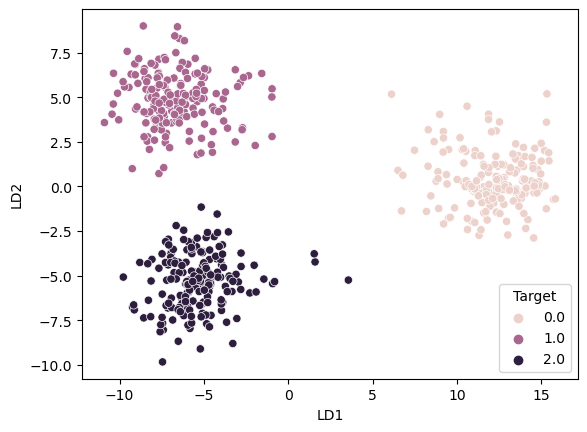

In [136]:
transform_data = normal_data.transform()
normal_data.plot()

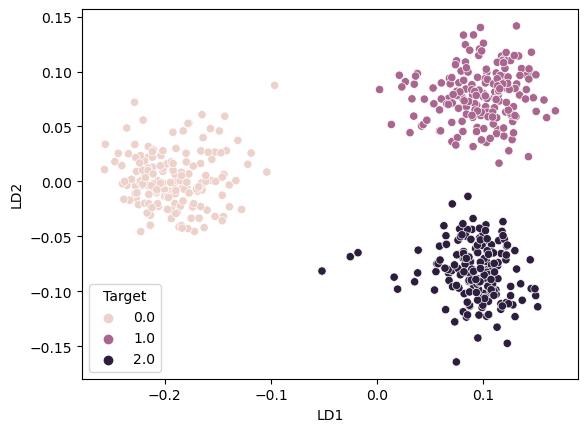

In [137]:
normalized_data = LDA(df, target)
normalized_data.normalize()
normalized_data.transform()

normalized_data.plot()

In [138]:
df = transform_data

data_train = df.sample(frac = 0.80)
data_test = df.sample(frac = 0.20)

label_train = pd.DataFrame(data_train, columns=["Target"])
label_test = pd.DataFrame(data_test, columns=["Target"])

data_train = data_train.sort_index(ascending=True)
data_train = data_train.reset_index(drop=True)
data_train.index = data_train.index + 1

data_test = data_test.sort_index(ascending=True)
data_test = data_test.reset_index(drop=True)
data_test.index = data_test.index + 1

label_train = label_train.sort_index(ascending=True)
label_train = label_train.reset_index(drop=True)
label_train.index = label_train.index + 1

label_test = label_test.sort_index(ascending=True)
label_test = label_test.reset_index(drop=True)
label_test.index = label_test.index + 1

In [139]:
data_train

,LD1,LD2,Target
1,-6.953390+0.000000j,-3.704522+0.000000j,2.0
2,11.088321+0.000000j,2.001001+0.000000j,0.0
3,-9.065211+0.000000j,6.842083+0.000000j,1.0
4,10.979089+0.000000j,-0.272564+0.000000j,0.0
5,-10.125417+0.000000j,5.220961+0.000000j,1.0
...,...,...,...
426,-3.006460+0.000000j,5.596057+0.000000j,1.0
427,9.378905+0.000000j,0.658365+0.000000j,0.0
428,-3.724808+0.000000j,5.288709+0.000000j,1.0
429,-5.751803+0.000000j,-3.419065+0.000000j,2.0


<AxesSubplot:xlabel='LD1', ylabel='LD2'>

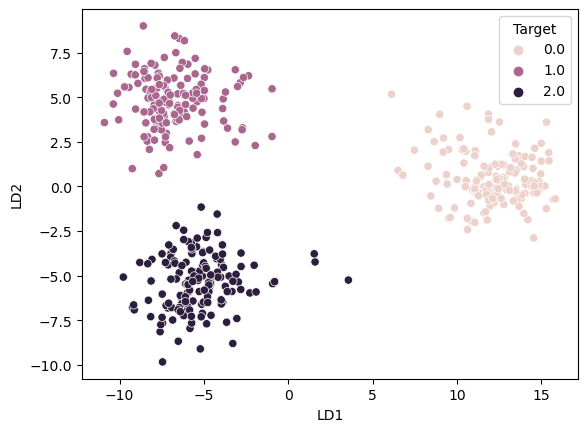

In [140]:
sns.scatterplot(x='LD1', y='LD2', hue='Target', data=data_train)

In [141]:
data_test

,LD1,LD2,Target
1,10.979089+0.000000j,-0.272564+0.000000j,0.0
2,10.377249+0.000000j,0.254352+0.000000j,0.0
3,11.410895+0.000000j,0.516922+0.000000j,0.0
4,-8.084973+0.000000j,-4.090920+0.000000j,2.0
5,-7.353248+0.000000j,7.224926+0.000000j,1.0
...,...,...,...
103,-7.658672+0.000000j,4.667719+0.000000j,1.0
104,-4.274923+0.000000j,5.196947+0.000000j,1.0
105,14.021470+0.000000j,0.405530+0.000000j,0.0
106,-3.981161+0.000000j,-6.359606+0.000000j,2.0


<AxesSubplot:xlabel='LD1', ylabel='LD2'>

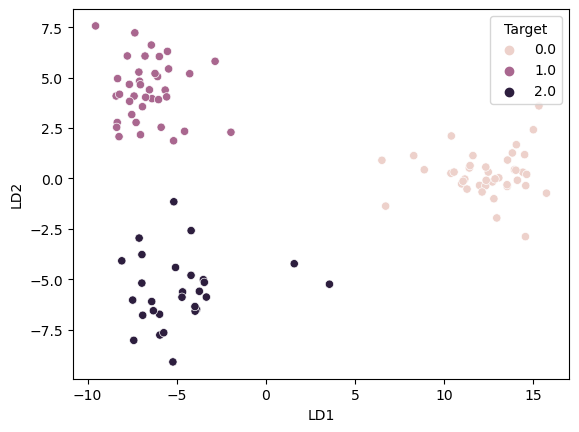

In [142]:
sns.scatterplot(x='LD1', y='LD2', hue='Target', data=data_test)

In [143]:
class GNB:
    
    def __init__(self, df_train, label_train):
        
        no_samples, no_features = df_train.shape
        self.classes = np.unique(label_train)
        no_classes = len(self.classes)
        
        #initializing mean, variance and prior probabilities

        df_0 =df_train.loc[label_train['Target'] == 0]
        df_1 =df_train.loc[label_train['Target'] == 1]
        df_2 =df_train.loc[label_train['Target'] == 2]

        df_0 = df_0.reset_index(drop=True)
        df_1 = df_1.reset_index(drop=True)
        df_2 = df_2.reset_index(drop=True)

        self.mean0 = df_0.loc[:,:].mean()
        self.mean1 = df_1.loc[:,:].mean()
        self.mean2 = df_2.loc[:,:].mean()

        self.covar0 = df_0.loc[:,:].cov()
        self.covar1 = df_1.loc[:,:].cov()
        self.covar2 = df_2.loc[:,:].cov()
         
        self.prior = np.zeros(no_classes, dtype = np.float64)
        
        label_count = [0, 0, 0]
        
        for i in range(len(df_train)):
            if int(label_train.values[i]) == 0:
                label_count[0] +=1
            elif int(label_train.values[i]) == 1:
                label_count[1] +=1
            else:
                label_count[2] +=1
        
        for c in self.classes:
                self.prior[int(c)] = float(label_count[int(c)]/len(df_train))
            
    def predict(self, X):
        y_pred = []
        for x in range(len(X)):
            y_pred.append(self._predict(X.iloc[x]))
        
        return y_pred
            
    def _predict(self, X):
        posteriors = []
        
        for c_indx in self.classes:
            
            prior = np.log(self.prior[int(c_indx)])
            class_conditional = np.sum(np.log(self.pdf(int(c_indx), X)))

            posterior = prior + class_conditional
            posteriors.append(posterior)
            
        return self.classes[np.argmax(posteriors)]
                
    def pdf(self, class_idx, x):
        if class_idx == 0:
            mean = self.mean0
            mean_tsp = self.mean0.transpose()
            covar = self.covar0
            covar_inv = np.linalg.inv(self.covar0)
            covar_det = np.linalg.det(self.covar0)

            numerator = float(np.exp(-np.dot(np.dot(np.subtract(x, mean),covar_inv),np.subtract(x.transpose(),mean_tsp))/2))
            denominator = 2 * np.pi * np.sqrt(covar_det) 
            return numerator / denominator
        
        elif class_idx == 1:
            mean = self.mean1
            mean_tsp = self.mean1.transpose()
            covar = self.covar1
            covar_inv = np.linalg.inv(self.covar1)
            covar_det = np.linalg.det(self.covar1)

            numerator = float(np.exp(-np.dot(np.dot(np.subtract(x, mean),covar_inv),np.subtract(x.transpose(),mean_tsp))/2))
            denominator = 2 * np.pi * np.sqrt(covar_det) 
            return numerator / denominator
        
        elif class_idx == 2:
            mean = self.mean2
            mean_tsp = self.mean2.transpose()
            covar = self.covar2
            covar_inv = np.linalg.inv(self.covar2)
            covar_det = np.linalg.det(self.covar0)

            numerator = float(np.exp(-np.dot(np.dot(np.subtract(x, mean),covar_inv),np.subtract(x.transpose(),mean_tsp))/2))
            denominator = 2 * np.pi * np.sqrt(covar_det) 
            return numerator / denominator
        
    def predict_boundary(self,X):
        y_pred = []
        for x in range(len(X)):
            y_pred.append(self._predict_boundary(X[x]))
        
        return y_pred
    
    def _predict_boundary(self, X):
        posteriors = []
        
        for c_indx in self.classes:
            
            prior = np.log(self.prior[int(c_indx)])
            class_conditional = np.sum(np.log(self.pdf(int(c_indx), X)))

            posterior = prior + class_conditional
            posteriors.append(posterior)
            
        if self.classes[np.argmax(posteriors)] == 0.0:
            return "predicted_0"
        elif self.classes[np.argmax(posteriors)] == 1.0:
            return "predicted_1"
        else:
            return "predicted_2"

In [144]:
pos_test = data_test.drop(['Target'], axis=1)
pos_train = data_train.drop(['Target'], axis=1)

In [145]:
prediction = GNB(pos_train, label_train)

pred_test = prediction.predict(pos_test)
pred_train = prediction.predict(pos_train)

correct=0

for i in range(len(pred_test)):
    if pred_test[i] == int(label_test.values[i]):
        correct+=1
        
print(f"Accuracy on test data is {correct/len(pred_test)*100}%")

correct = 0 

for i in range(len(pred_train)):
    if pred_train[i] == int(label_train.values[i]):
        correct+=1
        
print(f"Accuracy of train data is {correct/len(pred_train)*100}%")

Accuracy on test data is 100.0%
Accuracy of train data is 100.0%


In [146]:
pos_test['LD1'] = np.real(pos_test.LD1)
pos_test['LD2'] = np.real(pos_test.LD2)

The plot of classification boundary with test data is as follows:


<AxesSubplot:xlabel='LD1', ylabel='LD2'>

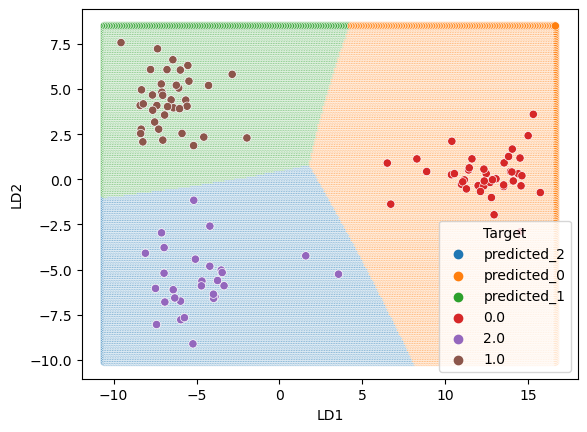

In [147]:
min_x, max_x = pos_test.iloc[:, 0].min()-1, pos_test.iloc[:, 0].max()+1
min_y, max_y = pos_test.iloc[:, 1].min()-1, pos_test.iloc[:, 1].max()+1

#creating a grid to draw a decision boundary

xgrid = np.arange(min_x, max_x, 0.1)
ygrid = np.arange(min_y, max_y, 0.1)

# create all of the lines and rows of the grid

xx, yy = np.meshgrid(xgrid, ygrid)

# flatten each grid to a vector

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x,y input for the model

grid = np.hstack((r1,r2))

model = GNB(pos_train, label_train)
boundary = model.predict_boundary(grid)

boundary = pd.DataFrame(boundary, columns=["Target"])
boundary_pos = pd.DataFrame(grid, columns=["LD1","LD2"])

boundary = boundary_pos.join(boundary)
boundary = boundary.append(data_test)

print("The plot of classification boundary with test data is as follows:")

sns.scatterplot(x="LD1", y="LD2", hue='Target', data=boundary)

Confusion matrix for test data is as follows:


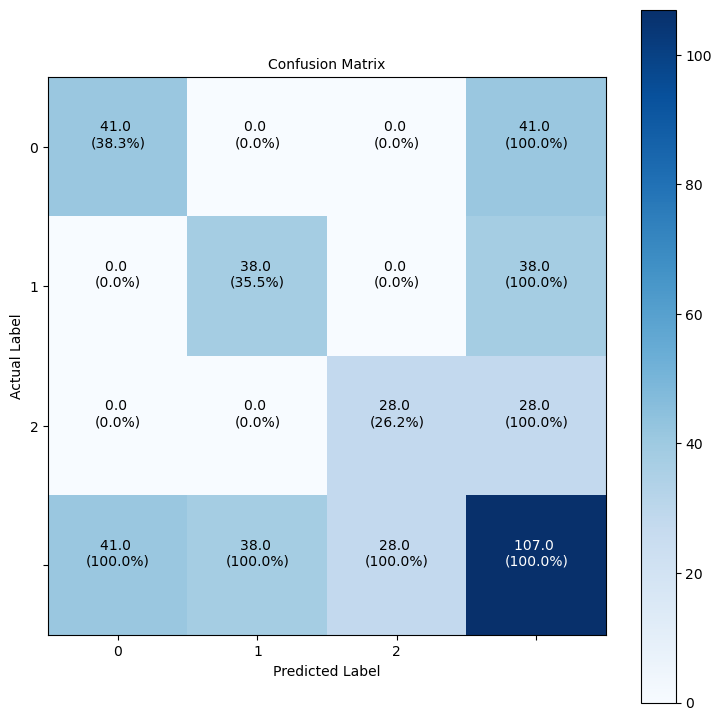

In [148]:
predicted = pd.DataFrame(pred_test, columns = ["Target"])
predicted.index = predicted.index + 1

actual = label_test

def confusion_matrix(actual, predicted):
    
    # extract the different classes
    no_classes = np.unique(actual)

    # initialize the confusion matrix
    confusion_matx = np.zeros((len(no_classes)+1, len(no_classes)+1))

    for a in range(len(actual)):
        confusion_matx[int(actual.iloc[a]), int(predicted.iloc[a])] +=1

    return confusion_matx


# Updating the function we made above

def plot_confusion_matrix(actual , predicted , classes = None , text_size = 10, figsize = (9 , 9)):

    # Setting the default figsize 
    
    figsize = figsize
    
    # Create the confusion matrix
    
    cm = confusion_matrix(actual, predicted)
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm[i,len(cm[0])-1] += cm[i,j]
            
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm[len(cm[0])-1,i] += cm[j,i]
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm[len(cm[0])-1,len(cm[0])-1] += cm[i,j]
    
    cm_norm = cm.astype('float') / len(actual)
    
    cm_norm[len(cm[0])-1,len(cm[0])-1] = 0
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm_norm[i,len(cm[0])-1] = cm[i,i]/cm[i,len(cm[0])-1]
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm_norm[len(cm[0])-1,j] = cm[j,j]/cm[len(cm[0])-1,j]
    
    for i in range(len(cm[0])-1):
        cm_norm[len(cm[0])-1,len(cm[0])-1] += cm[i,i]/len(actual)
        
    # Number of clases
    
    no_class = cm.shape[0]

    # Making our plot
    
    figure , conf_plt = plt.subplots(figsize = figsize)
    
    # Drawing the matrix plot 
    
    dr_conf = conf_plt.matshow(cm , cmap = plt.cm.Blues)
    figure.colorbar(dr_conf)

    # Setting labels
    
    if classes:
        labels = classes
    else:
        labels = [0, 1, 2,""]

    # Labeling axes
    
    conf_plt.set(title ='Confusion Matrix' , 
        xlabel = 'Predicted Label' , 
        ylabel = 'Actual Label' , 
        xticks = np.arange(no_class) , 
        yticks = np.arange(no_class) , 
        xticklabels = labels , 
        yticklabels = labels
        )
    
    # Setting the x axis labels
    
    conf_plt.xaxis.set_label_position('bottom')
    conf_plt.xaxis.tick_bottom()

    # Adjusting the size of labels
    conf_plt.title.set_size(text_size)
    conf_plt.xaxis.label.set_size(text_size)
    conf_plt.yaxis.label.set_size(text_size)

    # Setting threshold for colors 

    threshold = (cm.max() + cm.min()) / 2
    
    # Plot the text
    
    for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text(j , i , f'{cm[i , j]} \n({cm_norm[i , j]*100:.1f}%)' , 
            horizontalalignment = 'center' , 
            color = 'white' if cm[i , j] > threshold else 'black' , 
                size = text_size)

np.seterr(divide='ignore', invalid='ignore')

print("Confusion matrix for test data is as follows:")

plot_confusion_matrix(actual, predicted)

Confusion Matrix for train data is as follows:


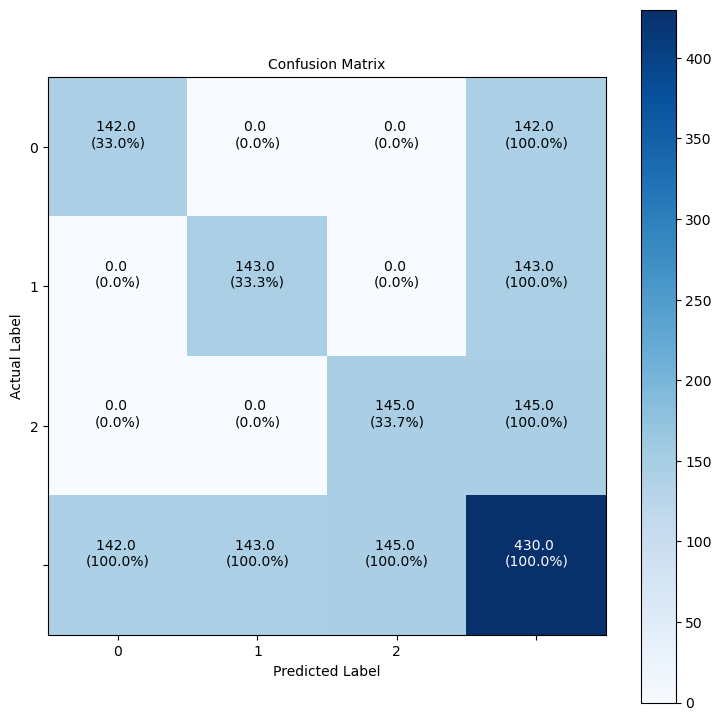

In [149]:
predicted = pd.DataFrame(pred_train, columns = ["Target"])
actual = label_train

np.seterr(divide='ignore', invalid='ignore')

print("Confusion Matrix for train data is as follows:")

plot_confusion_matrix(actual, predicted)